In [9]:
# Carrega as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # importa o Decision Tree Classifier
from sklearn.model_selection import train_test_split # importa o método train_test_split 
from sklearn import metrics #importa as métricas de avaliação de modelos do scikit-learn

In [23]:
#define o nome das colunas
#considerando o seguinte formato
#ta_native, course_instr, course, summer_regular, class_size, label
#1,23,3,1,19,3
#2,15,3,1,17,3
#...
#..
#.

nome_colunas = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size', 'label']
# Carrega o dataset
# nao tem cabeçalho, logo header=None
# coloca o cabeçalho em nome_colunas
pima = pd.read_csv("tae.csv", header=None, names=nome_colunas)


In [24]:
pima.head()

,ta_native,course_instr,course,summer_regular,class_size,label
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [29]:
feature_cols = nome_colunas[:5] #remove o label dos atributos previsores
X = pima[feature_cols] # Características (atributos previsores)
y = pima.label # Atributo/variável alvo

In [59]:
# Separa o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% treinamento e 40% teste
#print(X_train) #Parte para treinamento dos atributos previsores
#print(X_test) #Parte para teste dos atributos previsores
#print(y_train) #Parte para treinamento do meta
#print(y_test) #Parte para teste do meta

In [60]:
# Cria o objeto classificador para a árvore de decisão
clf = DecisionTreeClassifier()

# Treina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)
#print(y_test)
#print(y_pred)

In [61]:
# Apresenta a acurácia do modelo
acc_before_depth_reduction = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
#print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
#print("F1 Measure:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6557377049180327


In [62]:
import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!conda install --yes --prefix {sys.prefix} pydotplus
#!python --version
#!conda list

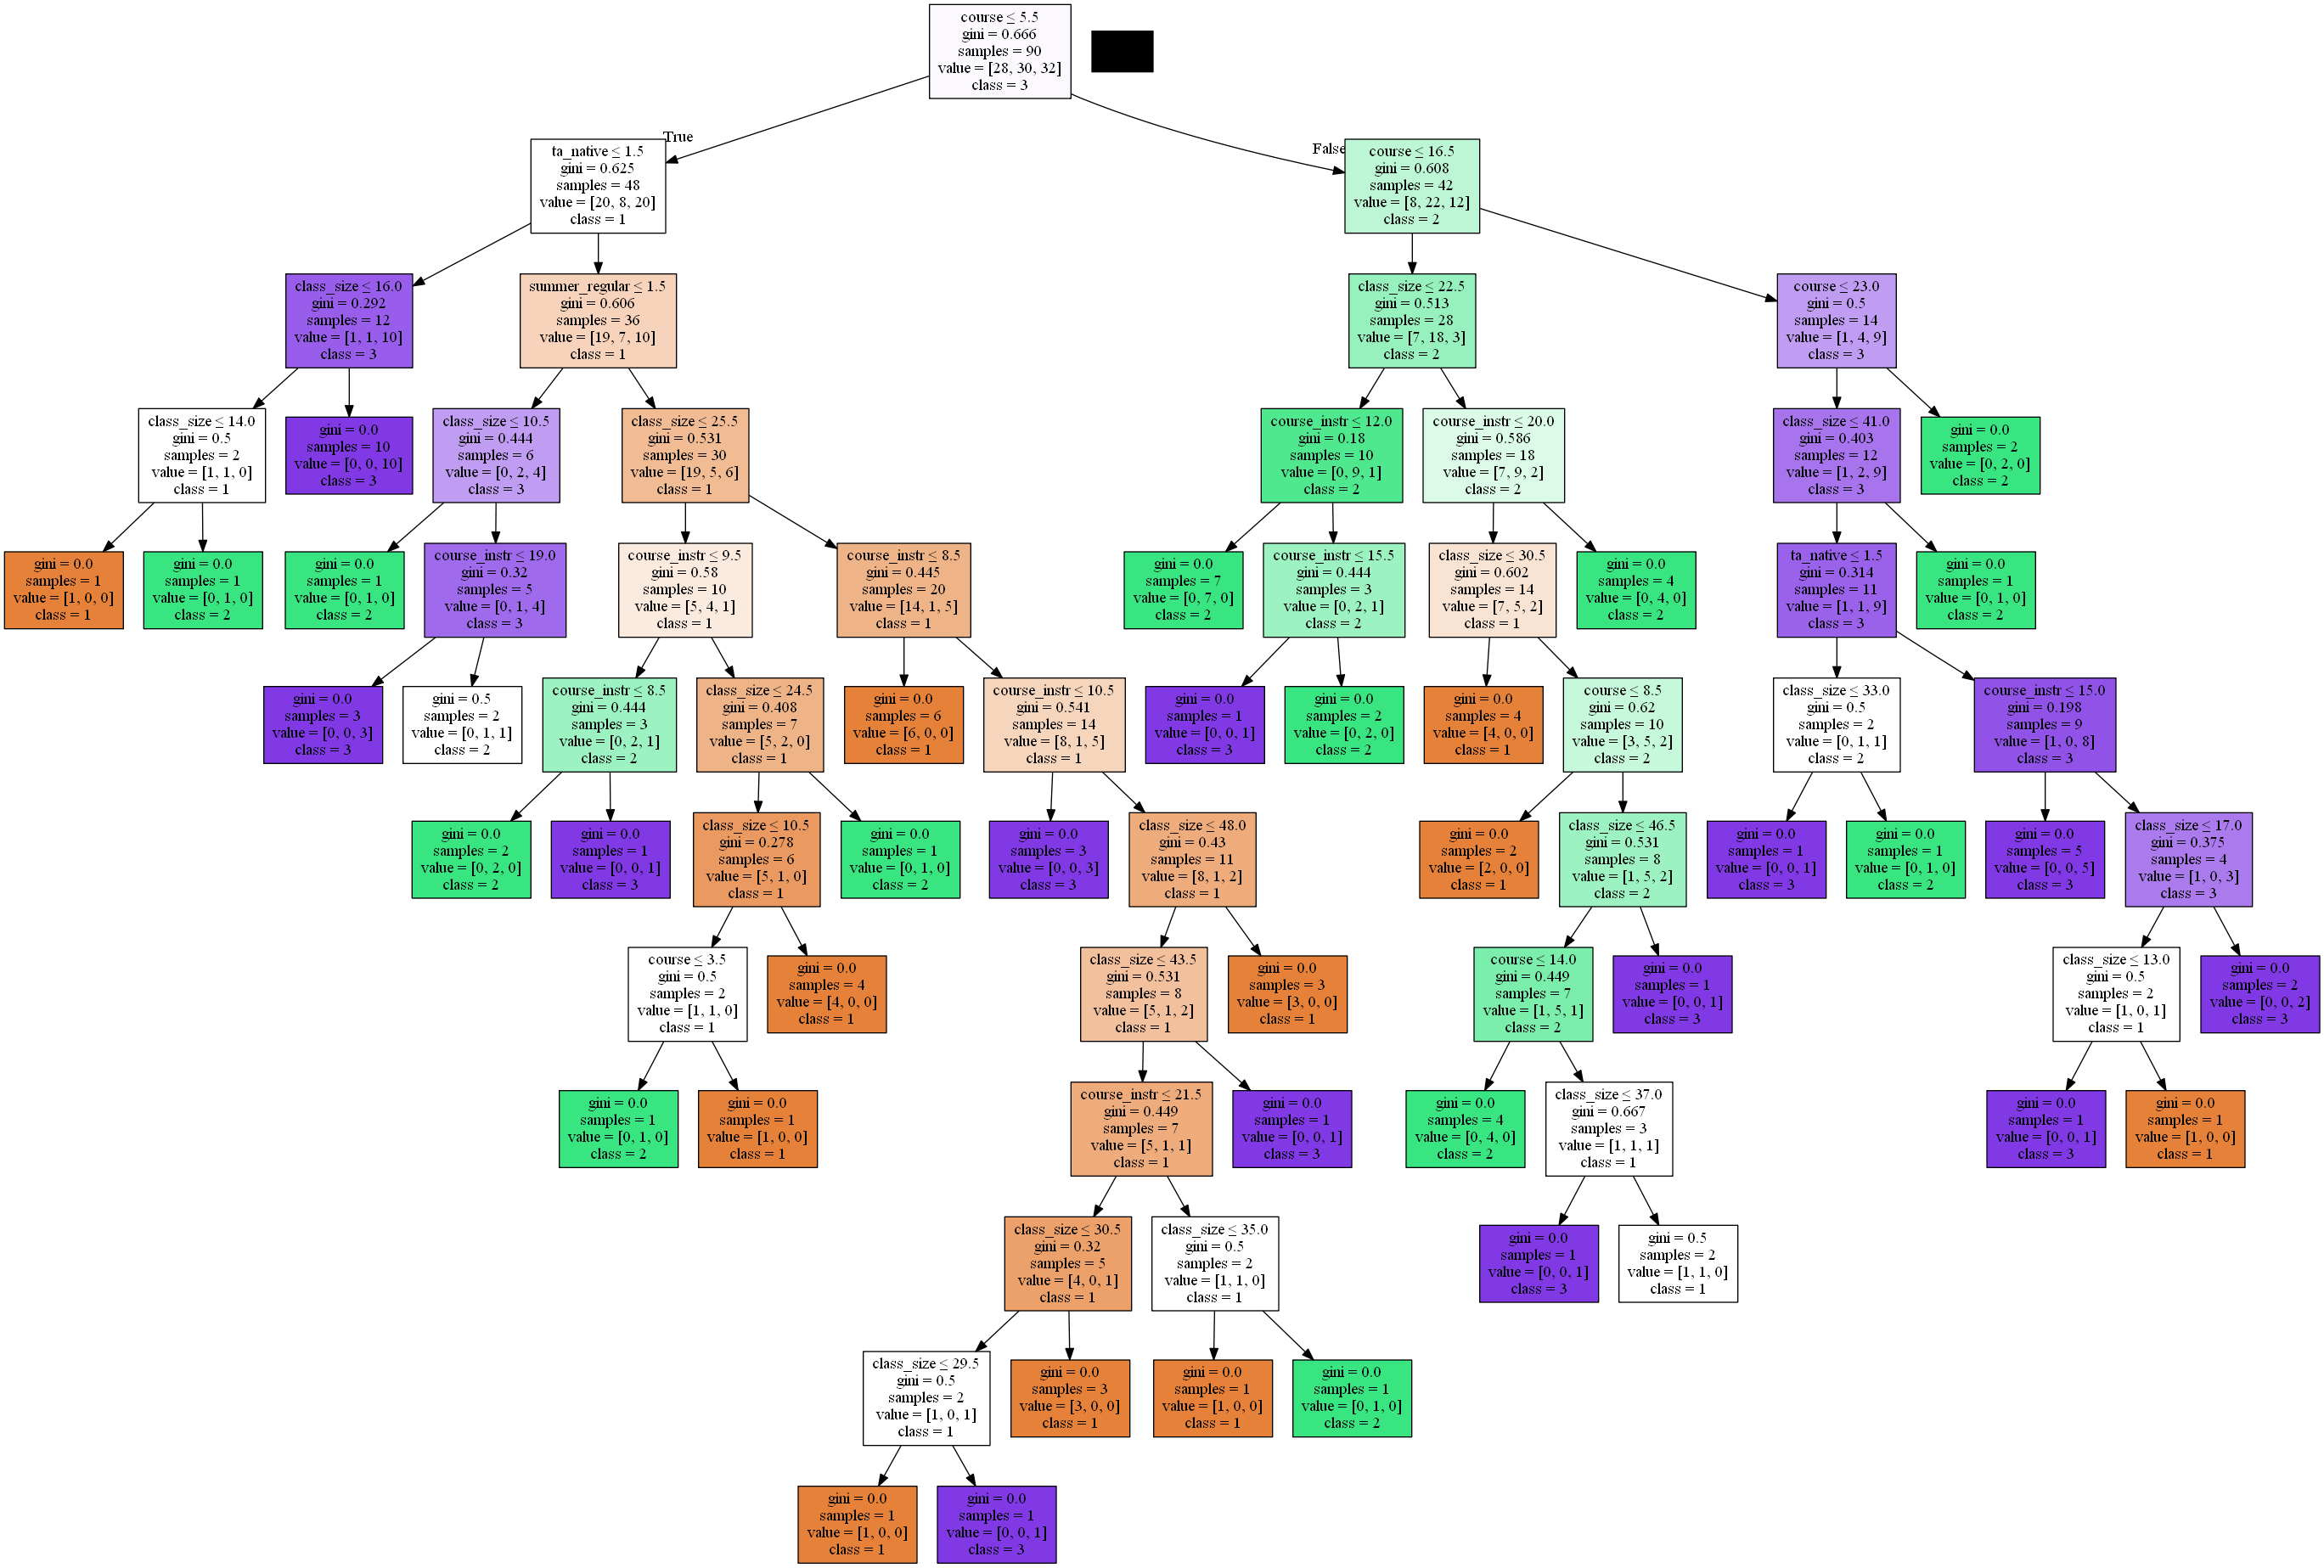

In [63]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus

classes_ = ['1', '2', '3']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tempo.png')
Image(graph.create_png())

In [64]:
# Cria o objeto classificador para a árvore de decisão
# Criterion é a função de medida de qualidade da separação da árvore. 
#   “gini" valor default (Gini impurity) 
#   “entropy” para information gain
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Treina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)

# Apresenta a acurácia do modelo depois da reducao de profundidade
acc_after_depth_reduction = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc_after_depth_reduction)


Accuracy: 0.5737704918032787


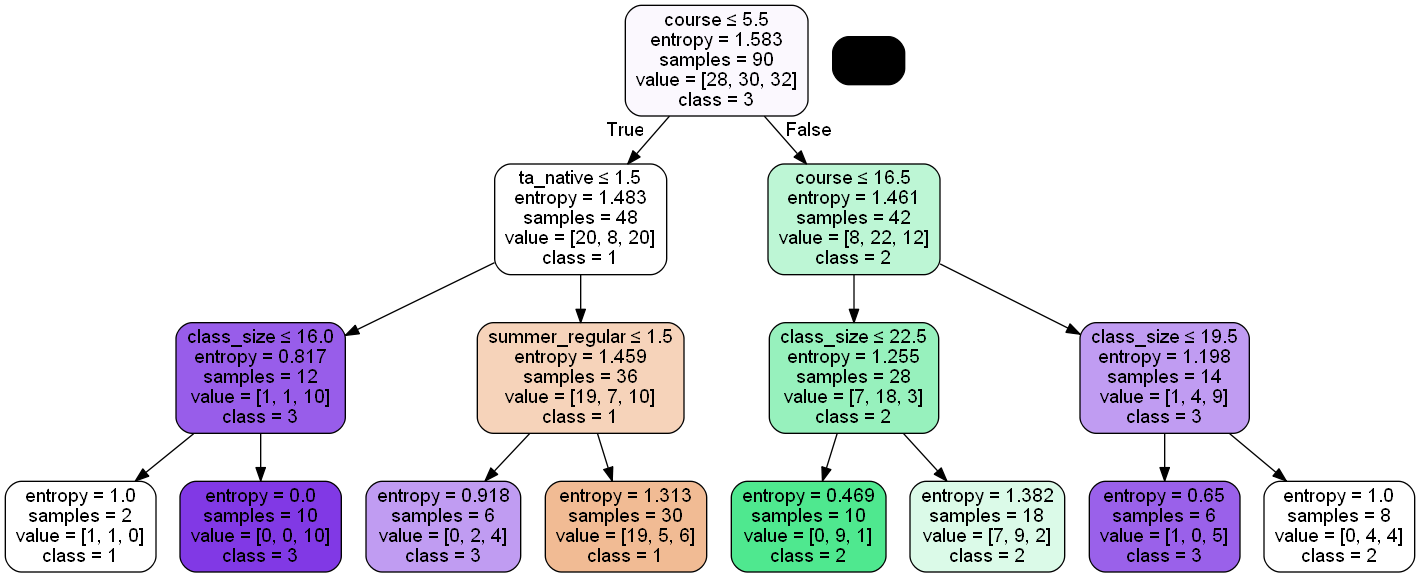

In [65]:
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tempo.png')
Image(graph.create_png())

In [66]:
print("Acurácia antes da redução de profundidade:", acc_before_depth_reduction)
print("Acurácia depois da redução de profundidade:", acc_after_depth_reduction)

Acurácia antes da redução de profundidade: 0.6557377049180327
Acurácia depois da redução de profundidade: 0.5737704918032787
